In [10]:
pip install pandas numpy nltk textblob matplotlib seaborn


In [11]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df = pd.read_csv("Hotel_Reviews.csv")
df.head()



,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [13]:
df['Full_Review'] = df['Positive_Review'] + " " + df['Negative_Review']
df[['Full_Review']].head()


,Full_Review
0,Only the park outside of the hotel was beauti...
1,No real complaints the hotel was great great ...
2,Location was good and staff were ok It is cut...
3,Great location in nice surroundings the bar a...
4,Amazing location and building Romantic settin...


In [14]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['Clean_Review'] = df['Full_Review'].apply(clean_text)



In [15]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Clean_Review'].apply(get_sentiment)
df[['Clean_Review','Sentiment']].head()


,Clean_Review,Sentiment
0,park outside hotel beautiful angry made post a...,Positive
1,real complaints hotel great great location sur...,Positive
2,location good staff ok cute hotel breakfast ra...,Positive
3,great location nice surroundings bar restauran...,Positive
4,amazing location building romantic setting boo...,Positive


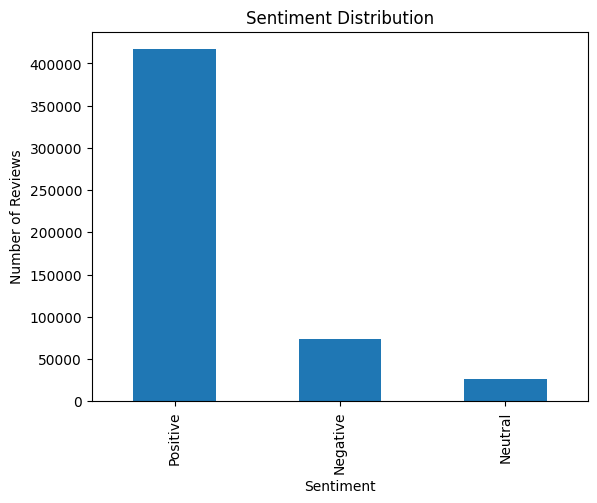

In [16]:
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


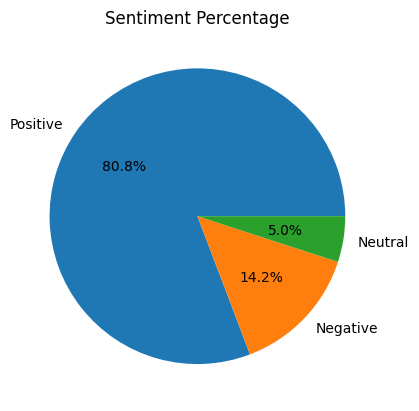

In [17]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Sentiment Percentage')
plt.show()
